<img src="https://static.uni-graz.at/fileadmin/nawi-institute/Erdwissenschaften/NawiGrazGeozentrum_Small.png" align="right" width=200>

# Recap notebook - Some additional notes on the lecture

*Developed by Johannes Haas University of Graz, 2022.*

In this notebook we will be revisiting a few things where some people seemed to struggle and introduce a few more points on producing nice plots and reading and producing Excel files.

### Lecture content

1. [Importing Scipy methods](#1.-Importing-Scipy-methods)
2. [Fitting a curve](#2.-Fitting-a-function-to-some-data)
3. [Least Squares solutions](#3.-Least-Squares-solutions)
4. [Finding the least-squares solution](#4.-Finding-the-least-squares-solution)

In [57]:
# Imports first
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1. Syntax, Functions and Errors

Remember, while python aims to be very close to a human language (try to remember the assembly example from the intro presentation for comparison!), it still differs by quite a bit and is very strict on its grammar!

Us humans are very good at just ignoring or "correcting" errors or weird grammar. If I tell you to

> You should pay attention, this is important!

you will all understand it, even if I'd get the grammar wrong, like

> Attention you should pay, important this is!

or 

>This Important! Pay attention!

With programming languages, we do not have this luxury! If the syntax doesn't fit, it fails.

Let's say we want to define a variable `a` as `1`. Obviously, this is



In [5]:
a = 1

But you could also try to do it the other way round. For us humans, it's pretty clear how it's meant, but for the computer, it isn't!

In [6]:
1 = a

SyntaxError: cannot assign to literal (352529522.py, line 1)

Same with a function, for us

In [9]:
def doublestring(string):
    # Takes a string and returns it twice
    S2 = string * 2
    return S2

and

In [11]:
def doublestring(string):
# Takes a string and returns it twice
S2 = string * 2
return S2

IndentationError: expected an indented block (1207523327.py, line 3)

are similar enough to understand it, but for the computer, they are not!
However, it can figure out what kind of error it is, and where it occurs.
Note the **last** line of the errors: `SyntaxError:` in the first example and `IndentationError:` in the last one. 
This already tells you what kind of error it is with more details after the `:` `cannot assign to literal` and `expected an indented block`.
The first one is indeed a bit enigmatic, but the second one should be self explanatory, telling you that python expected an indentation.
Note the `^` Character: It tries to give the position of the error.
But be careful: It gives the position where the error occurs, not necessarily what causes it! In these two cases, they are the same.

ValueError: x and y must have same first dimension, but have shapes (10,) and (11,)

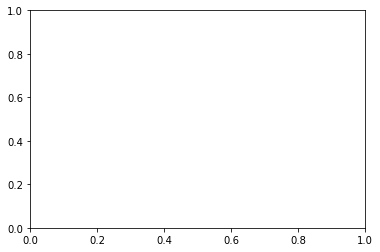

In [22]:
n=10
x_data = np.linspace(1,10, n)
n=11
y_data = np.random.rand(n)
plt.plot(x_data, y_data)

In the example above however, you have to go one step back. If you look at the first lines, it tells you

    ValueError                                Traceback (most recent call last)
    d:\Lectures\Computer_Methods\2022\recap.ipynb Cell 12' in <cell line: 5>()
          3 n=11
          4 y_data = np.random.rand(n)
    ----> 5 plt.plot(x_data, y_data)

Giving you the type of error (`ValueError`) and where it occurs (Full path to your file, different on your PC than the example in this box) and an arrow (`---->`) pointing at the line of code where the error occurs in.

Everything below is tracing the error throughout the whole of python, each new block telling you what went wrong. **Unless the error occured in a function you have written yourself (in this case, the second block is the most important, as this tells you what went wrong in your function), you can ignore all these lines, except for the last one again!**
Here, python again tries to be helpful, telling you `x and y must have same first dimension, but have shapes (10,) and (11,)`.
In this case, this means that you're trying to plot an `x` of length 10, against an `y` of length 11, which obviously doesn't work.

However, `----> 5 plt.plot(x_data, y_data)` isn't where we made the mistake, it's line `3 n=11`, where we accidentally overwrote our `n = 10` with `11`, thus causing `y_data` to have a different length from `x_data`.

The nice thing about jupyter notebooks is, that you can jump back and forth, changing things and trying out new stuff, but if you're (re-)using variables that you defined in some other code cell, unexpected things can happen! In the example above, it's hopefully pretty clear, with both `n` being so close, but with large notebooks, it can become difficult quite fast, and python can **not** point out which cell is causing trouble.

## 2. Some more Details on plotting

So far, we have been doing mostly very simple plots, not taking into account that

 - a) you sometimes have to plot more in one figure than one or two lines, and
 - b) you want your plots to be nice to look at, and more important: Publication ready.

If you just want to plot many things, quickly, just pick your desired combination of `color=`, `linestyle=` and/or `marker=`, e.g.:



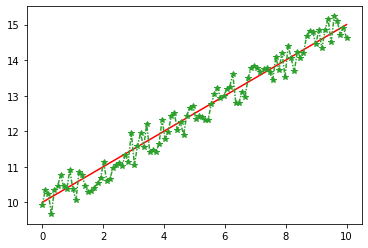

In [51]:
n = 100
x_data = np.linspace(0,10, 100)
y_true = 0.5 * x_data + 10
y_data = y_true + np.random.rand(n) - 0.5  # Add some random noise
plt.plot(x_data, y_true, color='red')
plt.plot(x_data, y_data, marker="*", linestyle=(0, (3, 1, 1, 1)), color='#2ca02c')

As you can see, there's various options. `color='blue'` and `marker='*'` are probably very obvious, but `linestyle=(0, (3, 1, 1, 1))` and `color='#2ca02c'` probably aren't.
As with almost everything in python, there's multiple ways to get your result. Take `color`: If you [look at the documentation](https://matplotlib.org/stable/tutorials/colors/colors.html) you see many ways to represent a color. You can get the most basic ones with single letters, e.g. `b` is blue and `k` is black and most *obvious* colors can simply also be adressed by their name (`blue`, `black`), but if you want something very specific, you have to either give the hex RGB string (`#0003ff`, `#000000`) or go wild with [XKCD](https://xkcd.com/color/rgb/)

(0.0, 12.0)

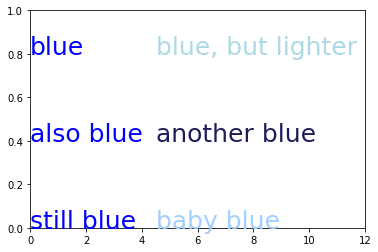

In [50]:
plt.figure()
plt.text(0, 0.8, 'blue', color='b', fontsize=25)
plt.text(0, 0.4, 'also blue', color='blue', fontsize=25)
plt.text(0, 0, 'still blue', color='#0003ff', fontsize=25)
plt.text(4.5, 0.8, 'blue, but lighter', color='lightblue', fontsize=25)
plt.text(4.5, 0.4, 'another blue', color='#1c1d5a', fontsize=25)
plt.text(4.5, 0, 'baby blue', color='xkcd:baby blue', fontsize=25)
plt.xlim(0, 12)

We'll spare you playing around with `markers` and `linestyle`, but we're certain you will find something you like in the documentation:

https://matplotlib.org/stable/api/markers_api.html and  [this here for basic](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle) and [here for custom linestyles](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html).

Great! Now you have everything you need for a nice plot!

However, we have not yet discussed the most important things: Readability and aesthetics.

If we're going back to our example:


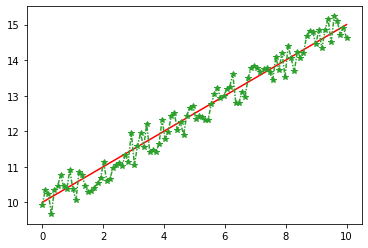

In [52]:
plt.plot(x_data, y_true, color='red')
plt.plot(x_data, y_data, marker="*", linestyle=(0, (3, 1, 1, 1)), color='#2ca02c')

Probably looks good enough, but it'll be hard to read for someone who's red-green blind and it probably won't be distinguishable when printing it in black and white, so you have to be careful to pick colors that are OK for red-green blind people (and there's a few more such things, not only the well known red and green) and that prints well, maybe also good to take into account that the colors must be different enough to be distinguishable, yet similar enough to allow for easily visible groups, maybe they should also have a hue, to be mapped to another feature, be visually pleasing and so on...

You can now start googling for all of those, or, this being python, just import something!

In [53]:
import seaborn as sns

[seaborn](https://seaborn.pydata.org/index.html) is a plotting package working on top of matplotlib, which has many, typical statiscal plots readily available. Apart from this, a lot of work went into making all kinds of plots good looking, with [color schemes](https://seaborn.pydata.org/tutorial/color_palettes.html) that don't exclude people or printers.

When using seaborn, it makes sense to simply not define colors for most plots, and just let seaborn use its defaults.

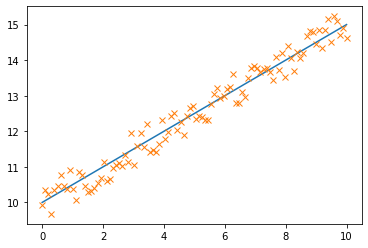

In [56]:
plt.plot(x_data, y_true)
plt.plot(x_data, y_data, marker='x', linestyle='')

## 3. Working with pandas and Excel sheets

As you've probably noticed, we much prefer `csv` files over Excel, as they're working perfectly fine since dozens of years and for many more years to come, no matter if you're opening them on notepad on windows, emacs on a linux machine or sublime text on a mac (and hundreds more editors...), whereas you might be strugling to open a 10 year old `xls` file on a modern Excel, or worse, LibreOffice on Linux or numbers on a Mac.

However, there are many benefits to Excel (and its smaller brothers), so it sometimes makes sense to work with Excel and python. Thus pandas can also read and write Excel files, by default.

Let's look at some stuff from the first Excel exercise, in python:

In [123]:
# read in some preprocessed Excel file for the Hammerbach
Hammerbach = pd.read_excel('Quellschüttung-Tagesmittel-395855.xlsx', header=[0], index_col=0, parse_dates=True)

In [128]:
print(Hammerbach.index)

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01',
               ...
               '2018-12-23', '2018-12-24', '2018-12-25', '2018-12-26',
               '2018-12-27', '2018-12-28', '2018-12-29', '2018-12-30',
               '2018-12-31', '2019-01-01'],
              dtype='datetime64[ns]', name='Messstelle:                ', length=8767, freq=None)


Similar, to `read_csv`, we have define a few things and immidiately got a dataframe, with working datetime index and all.

However, if you look at the original csv file from Ehyd, more work would be required in python, to get that one to work. If you just need to read one or two files, just prepare the file in notepad or similar, but if you want to plot *all* of ehyd (a few thousand files...), it's probably worth it to figure out how to do that in python, automatically.

<AxesSubplot:xlabel='Time', ylabel='Schüttung [l/s]'>

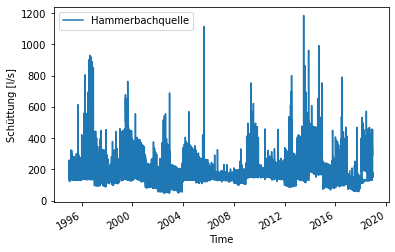

In [104]:
# Plot it, with labels
Hammerbach.plot(xlabel='Time', ylabel='Schüttung [l/s]')

In [118]:
# Get the basic statistics
Hammerbach.describe()

,Hammerbachquelle
count,8576.000000
mean,192.715205
std,92.967095
min,45.900000
25%,138.500000
50%,169.700000
75%,220.400000
max,1184.400000


In [124]:
# Get the data from 2014 on
Hammerbach_2014 = Hammerbach['2014':]

<AxesSubplot:xlabel='Time', ylabel='Schüttung [l/s]'>

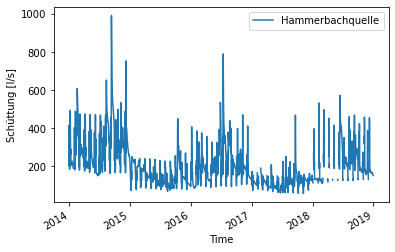

In [125]:
Hammerbach_2014.plot(xlabel='Time', ylabel='Schüttung [l/s]', )

In [127]:
# And save the 2014 data in an Excel file again:
Hammerbach_2014.to_excel('Hammerbach_2014.xlsx')